In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dataset path and parameters
dataset_path = r"C:\FlowersDataset"
batch_size = 32
img_size = (150, 150)

In [5]:
train_dataset = keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

Found 1714 files belonging to 2 classes.
Using 1372 files for training.


In [8]:
validation_dataset = keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)



Found 1714 files belonging to 2 classes.
Using 342 files for validation.


In [10]:
# Get class names
class_names = train_dataset.class_names
print("Class names:", class_names)

Class names: ['sunflower', 'tulip']


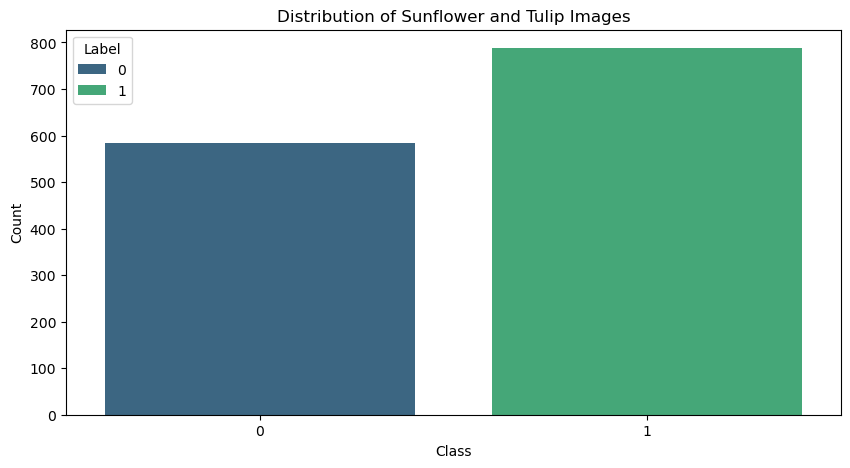

In [12]:
# Visualize class distribution
train_labels = np.concatenate([y for x, y in train_dataset], axis=0)
unique_labels, label_counts = np.unique(train_labels, return_counts=True)
label_df = pd.DataFrame({'Label': unique_labels, 'Count': label_counts})

plt.figure(figsize=(10, 5))
sns.barplot(data=label_df, x="Label", y="Count", hue="Label", palette="viridis")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Distribution of Sunflower and Tulip Images")
plt.show()

In [13]:
# Build the model with Input layer
model = keras.Sequential([
    keras.layers.Input(shape=(150, 150, 3)),
    keras.layers.Rescaling(1.0 / 255),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


In [16]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
# Train the model
model.fit(train_dataset, epochs=10, validation_data=validation_dataset)


Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 238ms/step - accuracy: 0.6246 - loss: 1.6912 - val_accuracy: 0.8480 - val_loss: 0.3510
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 237ms/step - accuracy: 0.8717 - loss: 0.3121 - val_accuracy: 0.9035 - val_loss: 0.2661
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 235ms/step - accuracy: 0.9083 - loss: 0.2399 - val_accuracy: 0.9006 - val_loss: 0.2630
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 239ms/step - accuracy: 0.9270 - loss: 0.1710 - val_accuracy: 0.8947 - val_loss: 0.2964
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 242ms/step - accuracy: 0.9213 - loss: 0.1919 - val_accuracy: 0.8830 - val_loss: 0.2865
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 240ms/step - accuracy: 0.9536 - loss: 0.1259 - val_accuracy: 0.8977 - val_loss: 0.2677
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 230ms/step - accuracy: 0.9889 - loss: 0.0410 - val_accuracy: 0.8977 - val_loss: 0.3026
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 234ms/step - accuracy: 0.9969 - loss: 0.0173 - val_accu

In [19]:
# Save the model
model.save("flower_classifier.keras")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


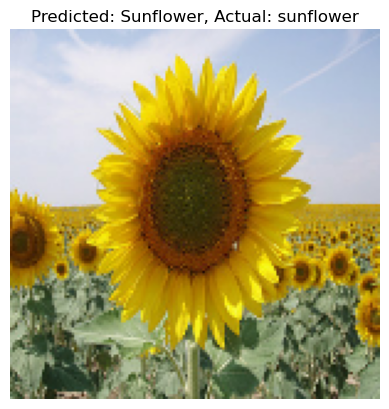

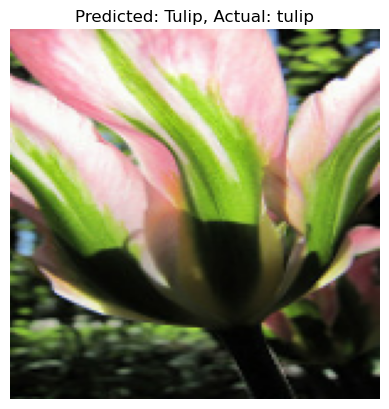

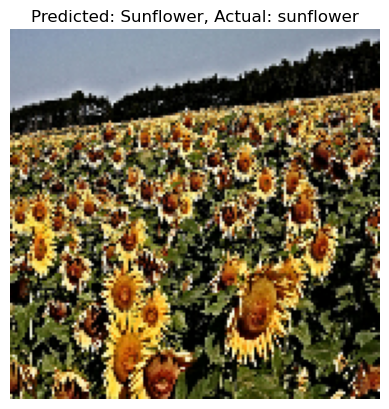

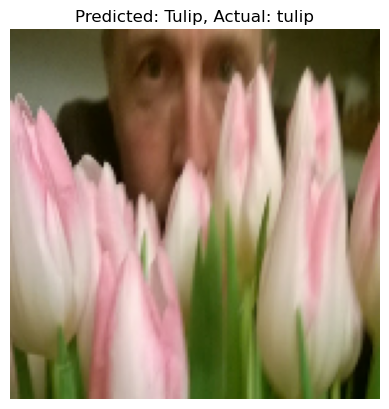

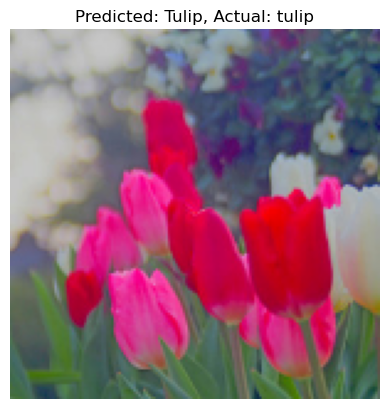

In [20]:
# Predict on a batch of images
for images, labels in validation_dataset.take(1):
    predictions = model.predict(images)
    for i in range(5):  # Display first 5 images
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Predicted: {'Sunflower' if predictions[i] <= 0.5 else 'Tulip'}, Actual: {class_names[int(labels[i])]}")
        plt.axis("off")
        plt.show()